In [1]:
from src.Robot import *
from IPython.display import HTML
import matplotlib.pyplot as plt
from src.Autobot import *

In [2]:
def plot_graph(graph, obstacle_segments, min_x, max_x, min_y, max_y):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title('Graph and nodes path', fontweight="bold")
    ax.set_aspect('equal')  # Set aspect ratio to 'equal' for square shape
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.set_xlabel(r'$x$ [m]')
    ax.set_ylabel(r'$y$ [m]')

    if obstacle_segments:
        for segment in obstacle_segments:
            x1, y1 = [segment[0][0], segment[1][0]], [segment[0][1], segment[1][1]]
            ax.plot(x1, y1, 'k-')

    for key in graph:
        ax.plot(key[0], key[1], 'o', color=(0.6, 0.6, 1.0, 0.35))  # Print the graph nodes
        for neighbor in graph[key]:
            x1, y1 = [key[0], neighbor[0]], [key[1], neighbor[1]]
            ax.plot(x1, y1, 'o-', color=(0.6, 0.6, 1.0, 0.35))  # Print the edge
    plt.show()

In [3]:
#polygons_vertexes_list = [[(20,20), (20,40), (40,40), (40,20)], [(28,28),(38,28),(28,38)], [(6,16),(13,17),(16,40)], [(40,12),(48,16),(38,20),(30,22)], [(17,8),(27,8),(27,22),(17,22)]]
#polygons_vertexes_list = [[(7,4), (13,4), (10,8)], [(28,28),(38,28),(28,38)], [(6,16),(13,17),(16,40)], [(40,12),(48,16),(38,20),(30,22)], [(17,8),(27,8),(27,22),(17,22)]]
# polygons_vertexes_list = [[(10.5,38.5), (10.5,42.5), (49.5,42.5), (49.5,38.5)], [(0.5,23.5), (0.5,28.5), (40,23.5), (40,28.5)], [(10.5,8.5), (10.5,14.5), (49.5,14.5), (49.5,8.5)]] # , [(28,4),(28,16),(32,16),(32,4)]]
polygons_vertexes_list = [[(10.5,38.5), (10.5,42.5), (49.5,42.5), (49.5,38.5)], [(10.5,8.5), (10.5,14.5), (49.5,14.5), (49.5,8.5)]]

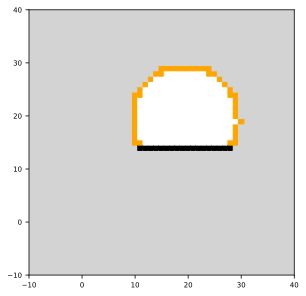

In [8]:
lidar = LiDAR(angle_interval=[0, 2 * math.pi], obstacles= Utilities.polygons_to_segments(Utilities.polygons_from_vertexes_list(polygons_vertexes_list)), n=150, reach=10)
occupancy_grid = OccupancyGrid(lidar, 1, [20, 20, -np.pi], nodes_distance_in_cells=5, minimum_distance_nodes_obstacles=2)
occupancy_grid.plot_grid()

In [9]:
robot_given_graph = Robot(in_map_obstacle_vertexes_list=polygons_vertexes_list, lidar_n=101, cell_dim=1)
robot_given_graph.set_exp_title("Prova")
# robot_given_graph.set_pd_controller(kp=0.5,kd=0.1) #kp=0.5,kd=0.1
robot_given_graph.simulation_setup(initial_state=[45,25,0], final_position=[45,45], cruise_velocity=10, final_time=10) #final_time = 15
robot_given_graph.simulate()
robot_given_graph.show_plots()
# animation = robot_given_graph.get_animation()
# HTML(animation.to_jshtml())

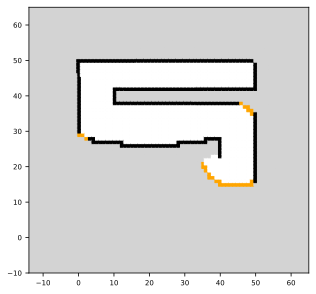

In [ ]:
# animation = robot_given_graph.get_animation()
# HTML(animation.to_jshtml())
# robot_given_graph.save_animation("prova", dpi=300)
robot_given_graph.occupancy_grid.plot_grid()

Target reached in 8.68 seconds, simulation will be stopped!


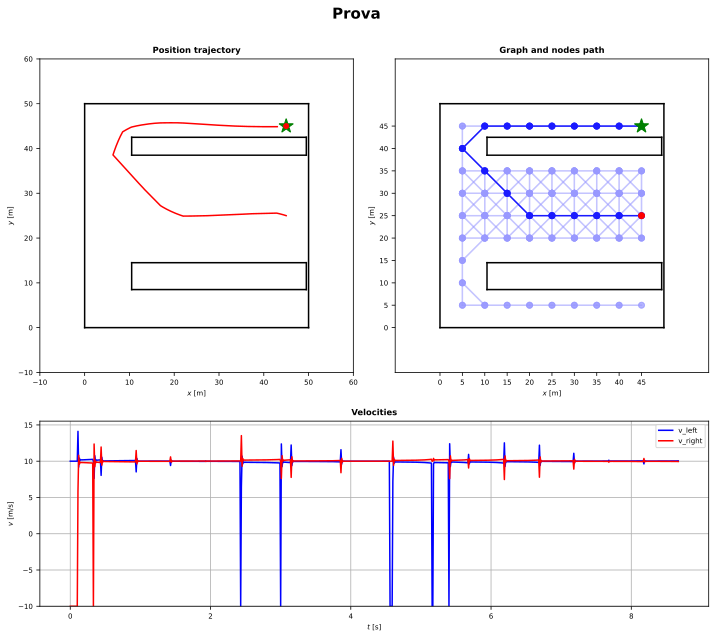

In [7]:
robot_adaptive_graph = Autobot(in_map_obstacle_vertexes_list=polygons_vertexes_list, lidar_n=35, cell_dim=2)
robot_adaptive_graph.set_exp_title("Prova")
# robot_adaptive_graph.set_pd_controller(kp=0.5,kd=0.1) #kp=0.5,kd=0.1
robot_adaptive_graph.simulation_setup(initial_state=[45,25,0], final_position=[45,45], cruise_velocity=10, final_time=10) #final_time = 15
robot_adaptive_graph.simulate()
robot_adaptive_graph.show_plots()
# animation = robot_adaptive_graph.get_animation()
# HTML(animation.to_jshtml())

In [8]:
fig, ax = plt.subplots()

for cell, value in robot_adaptive_graph.better_occupancy.grid.items():

    if value == CellInfo.NO_INFO:
        ax.add_patch(plt.Rectangle(xy=cell, width=10, height=10, color='gray'))
    elif value == CellInfo.FREE:
        ax.add_patch(plt.Rectangle(xy=cell, width=10, height=10, color='blue'))
    else:
        ax.add_patch(plt.Rectangle(xy=cell, width=10, height=10, color='red'))

plt.xlim([-0, 75])
plt.ylim([-0, 75])
plt.show()

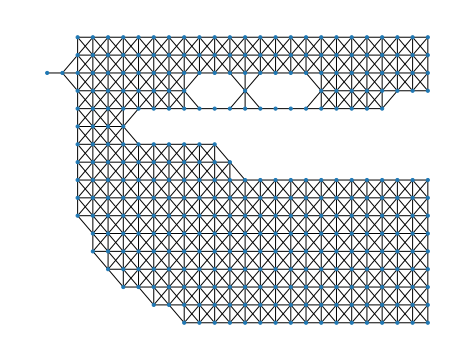

In [9]:
G = robot_adaptive_graph.better_occupancy.graph

pos = {(x,y):(x, y) for x,y in G.nodes()}

nx.draw(G, pos=pos, font_weight='bold', node_size=10)
plt.show()

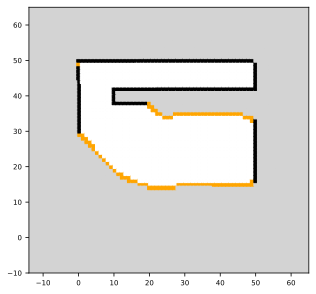

In [ ]:
# animation = robot_adaptive_graph.get_animation()
# HTML(animation.to_jshtml())
# robot_adaptive_graph.save_animation("prova", dpi=300)
robot_adaptive_graph.occupancy_grid.plot_grid()

In [ ]:
for key, content in robot_adaptive_graph.occupancy_grid.graph.items():
    if len(content) > 0:
        print(content)

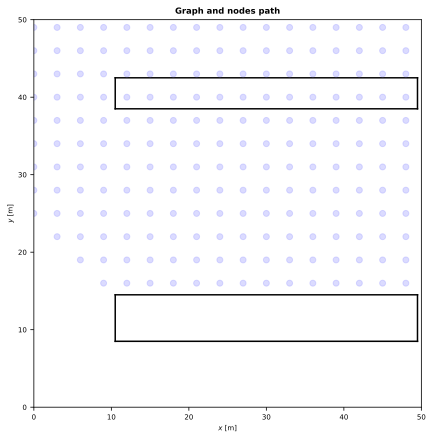

In [ ]:
plot_graph(robot_adaptive_graph.occupancy_grid.graph, Utilities.polygons_to_segments(Utilities.polygons_from_vertexes_list(polygons_vertexes_list)), 0, 50, 0, 50)

In [ ]:
def plot_nodes(nodes_dict, map_limits, obstacle_segments):
    # Create a new figure and set the title, aspect ratio, and labels
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title('Nodes Plot', fontweight="bold")
    ax.set_aspect('equal')  # Set aspect ratio to 'equal' for square shape
    ax.set_xlim(map_limits[0])
    ax.set_ylim(map_limits[1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Plot the obstacles
    if obstacle_segments:
        for segment in obstacle_segments:
            x1, y1 = [segment[0][0], segment[1][0]], [segment[0][1], segment[1][1]]
            ax.plot(x1, y1, 'k-')

    # Plot the nodes
    for key in nodes_dict:
        ax.plot(key[0], key[1], 'o', color=(0.6, 0.6, 1.0, 0.35))  # Print the graph nodes

    # Display the plot
    plt.show()
    
map_limits = [(0, 50), (0, 50)]

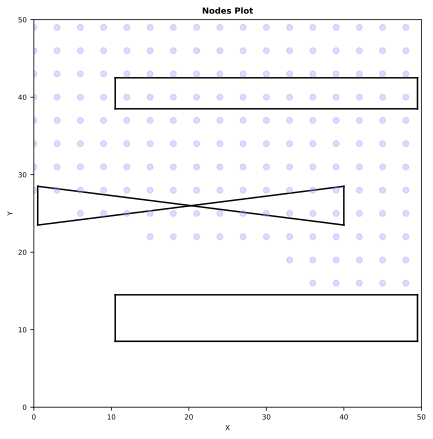

In [ ]:
plot_nodes(robot_adaptive_graph.occupancy_grid.graph_nodes, map_limits, Utilities.polygons_to_segments(Utilities.polygons_from_vertexes_list(polygons_vertexes_list)))

In [ ]:
robot_adaptive_graph.occupancy_grid.graph_nodes

{(36, 16): 0,
 (36, 19): 0,
 (36, 22): 0,
 (36, 25): 0,
 (36, 28): 0,
 (36, 31): 0,
 (36, 34): 0,
 (39, 16): 0,
 (39, 19): 0,
 (39, 22): 0,
 (39, 25): 0,
 (39, 28): 0,
 (39, 31): 0,
 (39, 34): 0,
 (42, 16): 0,
 (42, 19): 0,
 (42, 22): 0,
 (42, 25): 0,
 (42, 28): 0,
 (42, 31): 0,
 (42, 34): 0,
 (45, 16): 0,
 (45, 19): 0,
 (45, 22): 0,
 (45, 25): 0,
 (45, 28): 0,
 (45, 31): 0,
 (45, 34): 0,
 (48, 16): 0,
 (48, 19): 0,
 (48, 22): 0,
 (48, 25): 0,
 (48, 28): 0,
 (48, 31): 0,
 (48, 34): 0,
 (51, 16): 0,
 (51, 19): 0,
 (51, 22): 0,
 (51, 25): 0,
 (51, 28): 0,
 (51, 31): 0,
 (51, 34): 0,
 (54, 16): 0,
 (54, 19): 0,
 (54, 22): 0,
 (54, 25): 0,
 (54, 28): 0,
 (54, 31): 0,
 (54, 34): 0,
 (36, 37): 0,
 (39, 37): 0,
 (42, 37): 0,
 (45, 37): 0,
 (48, 37): 0,
 (51, 37): 0,
 (54, 37): 0,
 (33, 19): 0,
 (33, 22): 0,
 (33, 25): 0,
 (33, 28): 0,
 (33, 31): 0,
 (33, 34): 0,
 (33, 37): 0,
 (33, 40): 0,
 (36, 40): 0,
 (39, 40): 0,
 (42, 40): 0,
 (45, 40): 0,
 (48, 40): 0,
 (51, 40): 0,
 (30, 22): 0,
 (30, 

In [1]:
from src.BetterOccupancy import *
from src.Utilities import *
from src.LiDAR import *
import matplotlib.pyplot as plt

polygons_vertexes_list = [[(10.5,38.5), (10.5,42.5), (49.5,42.5), (49.5,38.5)], [(10.5,8.5), (10.5,14.5), (49.5,14.5), (49.5,8.5)]]

obstacles = polygons_to_segments(polygons_from_vertexes_list(polygons_vertexes_list))

lidar = LiDAR(obstacles=obstacles, n=36)
occupancy_grid = BetterOccupancy(pos=(20, 5), lidar_reach=lidar.reach)

In [2]:
measure = lidar.measure(position=(20, 5), heading_angle=0)
measure

{0.0: (None, None),
 0.17453292519943295: (None, None),
 0.3490658503988659: (None, None),
 0.5235987755982988: (7.000000000000002, (26.062177826491073, 8.5)),
 0.6981317007977318: (5.445033394011444, (24.171137574079737, 8.5)),
 0.8726646259971648: (4.568925512662974, (22.93684870912048, 8.5)),
 1.0471975511965976: (4.041451884327381, (22.02072594216369, 8.5)),
 1.2217304763960306: (3.724622203665693, (21.27389581993171, 8.5)),
 1.3962634015954636: (3.5539931416001074, (20.617144432479627, 8.5)),
 1.5707963267948966: (3.5, (20.0, 8.5)),
 1.7453292519943295: (3.5539931416001074, (19.382855567520373, 8.5)),
 1.9198621771937625: (3.724622203665692, (18.726104180068294, 8.5)),
 2.0943951023931953: (4.041451884327381, (17.97927405783631, 8.5)),
 2.2689280275926285: (4.568925512662974, (17.06315129087952, 8.5)),
 2.443460952792061: (5.445033394011442, (15.828862425920267, 8.5)),
 2.6179938779914944: (7.000000000000001, (13.937822173508929, 8.5)),
 2.792526803190927: (None, None),
 2.9670597

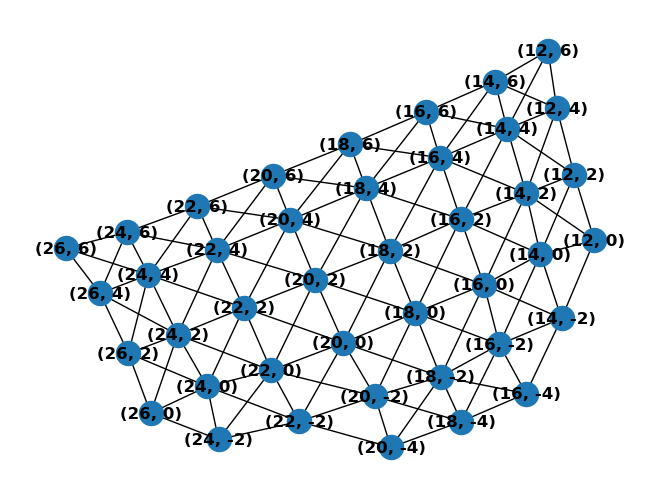

In [3]:
occupancy_grid.update_grid(pos=np.array([20, 5]), measure=measure)
occupancy_grid.update_graph()

nx.draw(occupancy_grid.graph, with_labels=True, font_weight='bold')
plt.show()

In [9]:
np.array(occupancy_grid.graph.nodes()) - np.ones((41, 2))

array([[15., -5.],
       [17., -5.],
       [19., -5.],
       [13., -3.],
       [15., -3.],
       [17., -3.],
       [19., -3.],
       [21., -3.],
       [23., -3.],
       [11., -1.],
       [13., -1.],
       [15., -1.],
       [17., -1.],
       [19., -1.],
       [21., -1.],
       [23., -1.],
       [25., -1.],
       [11.,  1.],
       [13.,  1.],
       [15.,  1.],
       [17.,  1.],
       [19.,  1.],
       [21.,  1.],
       [23.,  1.],
       [25.,  1.],
       [11.,  3.],
       [13.,  3.],
       [15.,  3.],
       [17.,  3.],
       [19.,  3.],
       [21.,  3.],
       [23.,  3.],
       [25.,  3.],
       [11.,  5.],
       [13.,  5.],
       [15.,  5.],
       [17.,  5.],
       [19.,  5.],
       [21.,  5.],
       [23.,  5.],
       [25.,  5.]])

In [3]:
for angle, data in measure.items():
    print(f'angle: {angle}')
    occupancy_grid.mark_cells_in_ray(pos=np.array([20, 5]), angle=angle, measurement=data)


angle: 0.0
none steps
angle: 0.3141592653589793
{'x': [1, 1, 0, 1, 1], 'y': [0, 0, 1, 0, 0]}
angle: 0.6283185307179586
{'x': [0, 1, 0, 1], 'y': [1, 0, 1, 0]}
angle: 0.9424777960769379
{'x': [0, 0], 'y': [1, 1]}
angle: 1.2566370614359172
{'x': [0, 0], 'y': [1, 1]}
angle: 1.5707963267948966
none steps
angle: 1.8849555921538759
{'x': [-1, 0, 0], 'y': [0, 1, 1]}
angle: 2.199114857512855
{'x': [-1, 0, -1], 'y': [0, 1, 0]}
angle: 2.5132741228718345
{'x': [-1, -1, 0, -1], 'y': [0, 0, 1, 0]}
angle: 2.827433388230814
{'x': [-1, -1, -1, -1, 0, -1], 'y': [0, 0, 0, 0, 1, 0]}
angle: 3.141592653589793
none steps
angle: 3.4557519189487724
{'x': [-1, -1, -1, -1, 0, -1], 'y': [0, 0, 0, 0, -1, 0]}
angle: 3.7699111843077517
{'x': [-1, -1, 0, -1, 0, -1, -1], 'y': [0, 0, -1, 0, -1, 0, 0]}
angle: 4.084070449666731
{'x': [-1, 0, -1, 0, -1, 0, 0], 'y': [0, -1, 0, -1, 0, -1, -1]}
angle: 4.39822971502571
{'x': [-1, 0, 0, 0, -1, 0, 0], 'y': [0, -1, -1, -1, 0, -1, -1]}
angle: 4.71238898038469
none steps
angle: 5.

In [12]:
_, endpoint = measure[0.6283185307179586]

# occupancy_grid.mark_cells_in_ray(pos=(20, 5), measurement=measure[0.6283185307179586])

# for _, data in measure.items():
#     if data[0] is not None:
#         dist, endpoint = data
#         occupancy_grid.mark_cells_in_ray(pos=(20, 5), end_pos=endpoint)

In [4]:
steps = occupancy_grid.dda(20, 5, endpoint[0], endpoint[1])

print(f'endpoint: {occupancy_grid.get_grid_position((20, 5))}, steps: {steps}')

endpoint: (20, 4), steps: {'x': [0, 1, 0, 1], 'y': [1, 0, 1, 0]}


In [9]:
for key, value in occupancy_grid.grid.items():
    if value != CellInfo.NO_INFO:
        print((key, value))

((16, -4), <CellInfo.FREE: 2>)
((18, -4), <CellInfo.FREE: 2>)
((20, -4), <CellInfo.FREE: 2>)
((14, -2), <CellInfo.FREE: 2>)
((16, -2), <CellInfo.FREE: 2>)
((18, -2), <CellInfo.FREE: 2>)
((20, -2), <CellInfo.FREE: 2>)
((22, -2), <CellInfo.FREE: 2>)
((24, -2), <CellInfo.FREE: 2>)
((26, -2), <CellInfo.FREE: 2>)
((12, 0), <CellInfo.FREE: 2>)
((14, 0), <CellInfo.FREE: 2>)
((16, 0), <CellInfo.FREE: 2>)
((18, 0), <CellInfo.FREE: 2>)
((20, 0), <CellInfo.FREE: 2>)
((22, 0), <CellInfo.FREE: 2>)
((24, 0), <CellInfo.FREE: 2>)
((26, 0), <CellInfo.FREE: 2>)
((12, 2), <CellInfo.FREE: 2>)
((14, 2), <CellInfo.FREE: 2>)
((16, 2), <CellInfo.FREE: 2>)
((18, 2), <CellInfo.FREE: 2>)
((20, 2), <CellInfo.FREE: 2>)
((22, 2), <CellInfo.FREE: 2>)
((24, 2), <CellInfo.FREE: 2>)
((26, 2), <CellInfo.FREE: 2>)
((12, 4), <CellInfo.FREE: 2>)
((14, 4), <CellInfo.FREE: 2>)
((16, 4), <CellInfo.FREE: 2>)
((18, 4), <CellInfo.FREE: 2>)
((20, 4), <CellInfo.FREE: 2>)
((22, 4), <CellInfo.FREE: 2>)
((24, 4), <CellInfo.FREE: 2>)


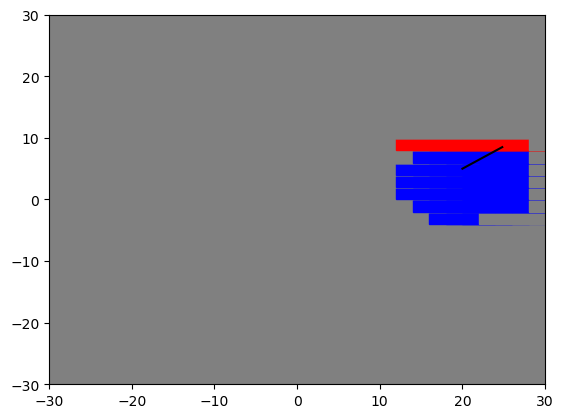

In [13]:
fig, ax = plt.subplots()

for cell, value in occupancy_grid.grid.items():
    if value == CellInfo.NO_INFO:
        ax.add_patch(plt.Rectangle(xy=cell, width=10, height=10, color='gray'))
    elif value == CellInfo.FREE:
        ax.add_patch(plt.Rectangle(xy=cell, width=10, height=10, color='blue'))
    else:
        ax.add_patch(plt.Rectangle(xy=cell, width=10, height=10, color='red'))

ax.plot([20, endpoint[0]], [5, endpoint[1]], color='black')

plt.xlim([-30, 30])
plt.ylim([-30, 30])
plt.show()

In [6]:
for key, value in occupancy_grid.grid.items():
    if value != CellInfo.NO_INFO:
        print((key, value))

((20, 4), <CellInfo.FREE: 2>)
((20, 6), <CellInfo.FREE: 2>)
((20, 8), <CellInfo.FREE: 2>)
((22, 8), <CellInfo.FREE: 2>)
((24, 8), <CellInfo.OBSTACLE: -1>)
((24, 10), <CellInfo.FREE: 2>)
((26, 10), <CellInfo.FREE: 2>)
((26, 12), <CellInfo.FREE: 2>)
((28, 12), <CellInfo.FREE: 2>)


[[30.         29.51056516 24.81733672 22.54289885 21.13721894 20.
  18.86278106 17.45710115 15.18266328 10.48943484 10.         10.48943484
  11.90983006 14.12214748 16.90983006 20.         23.09016994 25.87785252
  28.09016994 29.51056516 30.        ]
 [ 5.          8.09016994  8.5         8.5         8.5         8.5
   8.5         8.5         8.5         8.09016994  5.          1.90983006
  -0.87785252 -3.09016994 -4.51056516 -5.         -4.51056516 -3.09016994
  -0.87785252  1.90983006  5.        ]]


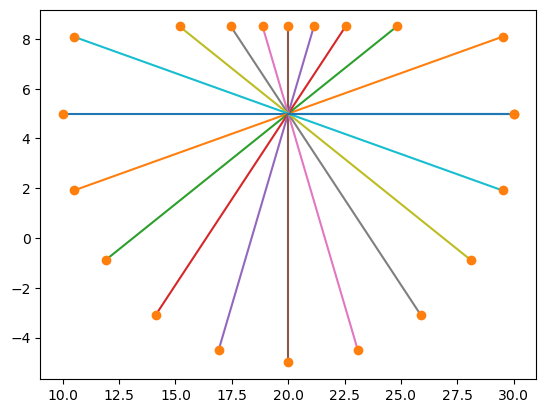

In [3]:
fig = lidar.plot_robot_and_rays(pos=(20, 5), measure=measure)
plt.show()

In [1]:
occupancy_grid.enlarge_grid_if_needed(pos=(20, 5))

fig = occupancy_grid.plot_radius_and_grid((20, 5))

plt.show()

NameError: name 'occupancy_grid' is not defined